#Final Project: Deep Learning for Missile Guidance, Navigation, and Control
- Author: Jaxon Topel
- Date: 11/4/2024 - 11/14/2024

In [ ]:
# Imports
import matplotlib.pyplot as plt
import cv2
import os
import random
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from PIL import Image

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define the paths to the images and labels directories
train_images = "/content/drive/MyDrive/EEL 4815/ships-aerial-images/train/images"
train_labels = "/content/drive/MyDrive/EEL 4815/ships-aerial-images/train/labels"

test_images = "/content/drive/MyDrive/EEL 4815/ships-aerial-images/test/images"
test_labels = "/content/drive/MyDrive/EEL 4815/ships-aerial-images/test/labels"

val_images = "/content/drive/MyDrive/EEL 4815/ships-aerial-images/valid/images"
val_labels = "/content/drive/MyDrive/EEL 4815/ships-aerial-images/valid/labels"

The image has dimensions 512x512 and 3 channels.
The image has dimensions 512x512 and 3 channels.
The image has dimensions 416x416 and 3 channels.
The image has dimensions 768x768 and 3 channels.
The image has dimensions 416x416 and 3 channels.
The image has dimensions 768x768 and 3 channels.
The image has dimensions 2047x1585 and 3 channels.
The image has dimensions 768x768 and 3 channels.
The image has dimensions 2047x1585 and 3 channels.
The image has dimensions 768x768 and 3 channels.
The image has dimensions 512x512 and 3 channels.
The image has dimensions 512x512 and 3 channels.
The image has dimensions 768x768 and 3 channels.
The image has dimensions 768x768 and 3 channels.
The image has dimensions 416x416 and 3 channels.
The image has dimensions 416x416 and 3 channels.


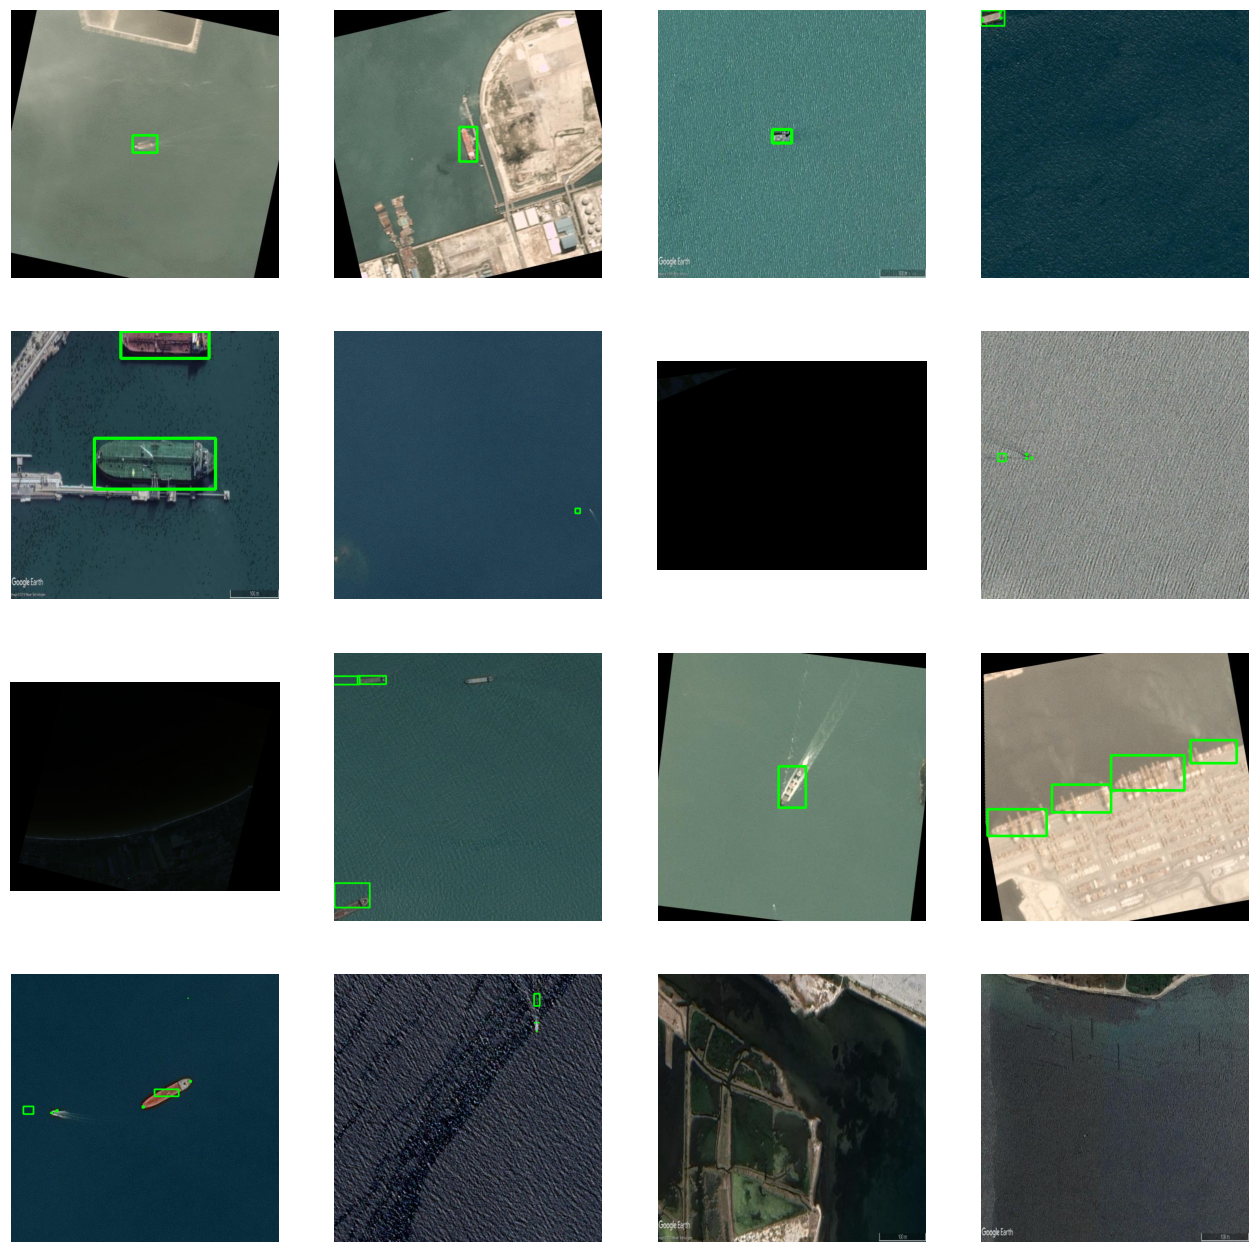

In [ ]:

# Get a list of all the image files in the training images directory
image_files = os.listdir(train_images)

# Choose 16 random image files from the list
random_images = random.sample(image_files, 16)

# Set up the plot
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4

    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    # Loop over the labels and plot the object detections
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)

    # Get the size of the image
    height, width, channels = image.shape
    print(f"The image has dimensions {width}x{height} and {channels} channels.")


    # Show the image with the object detections
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()

In [ ]:
# Define a resize function
def resize_image(image, new_size=(128, 128)):
  return cv2.resize(image, new_size)

In [ ]:
# Image Pre-processing

for i, image_file in enumerate(random_images):
  # Load the image
  image_path = os.path.join(train_images, image_file)
  image = cv2.imread(image_path)

  # Resize all the images.
  image = resize_image(image)

  # Get the size of the image
  height, width, channels = image.shape
  print(f"The image has dimensions {width}x{height} and {channels} channels.")

The image has dimensions 128x128 and 3 channels.
The image has dimensions 128x128 and 3 channels.
The image has dimensions 128x128 and 3 channels.
The image has dimensions 128x128 and 3 channels.
The image has dimensions 128x128 and 3 channels.
The image has dimensions 128x128 and 3 channels.
The image has dimensions 128x128 and 3 channels.
The image has dimensions 128x128 and 3 channels.
The image has dimensions 128x128 and 3 channels.
The image has dimensions 128x128 and 3 channels.
The image has dimensions 128x128 and 3 channels.
The image has dimensions 128x128 and 3 channels.
The image has dimensions 128x128 and 3 channels.
The image has dimensions 128x128 and 3 channels.
The image has dimensions 128x128 and 3 channels.
The image has dimensions 128x128 and 3 channels.


In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        # Convolutional layers with more filters and additional layers
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),              # Batch normalization
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.3),                 # Dropout layer

            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.3),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),  # Additional conv layer
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.3),

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),  # Additional conv layer
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.3)
        )

        # Global Average Pooling instead of fully flattening
        self.global_avg_pool = nn.AdaptiveAvgPool2d(1)

        # Fully connected layers
        self.fc_layers = nn.Sequential(
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 1)  # Binary classification output
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.global_avg_pool(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.fc_layers(x)
        return x

In [ ]:
def read_label_file(label_path):
  """
  Reads labels from a text file.

  Args:
      label_path (str): Path to the label text file.

  Returns:
      int: 1 if an object is present, 0 otherwise.
  """

  with open(label_path, "r") as f:
    for line in f:
      # If any object is found, return 1
      return 1

  # If no objects are found, return 0
  return 0

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, images_dir, labels_dir, transform=None):
        self.images_dir = images_dir
        self.labels_dir = labels_dir
        self.transform = transform
        self.image_files = os.listdir(images_dir)

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_path = os.path.join(self.images_dir, self.image_files[idx])
        label_path = os.path.join(self.labels_dir, self.image_files[idx].replace('.jpg', '.txt'))  # Adjust the extension as needed

        image = Image.open(image_path).convert('RGB')
        label = torch.tensor(read_label_file(label_path))  # Implement a function to read labels from .txt files

        if self.transform:
            image = self.transform(image)

        return image, label

In [ ]:
# Hyperparameters
batch_size = 64
learning_rate = 0.001
momentum = 0.9
epochs = 5

# Define data transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

# CustomDataset should already be defined to load your images and labels
dataset = CustomDataset(train_images, train_labels, transform=transform)
loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# Calculate mean and std across dataset
mean = 0.
std = 0.
total_images_count = 0

for images, _ in loader:
    batch_samples = images.size(0)  # Batch size (the last batch can have fewer samples)
    images = images.view(batch_samples, images.size(1), -1)
    mean += images.mean(2).sum(0)
    std += images.std(2).sum(0)
    total_images_count += batch_samples

mean /= total_images_count
std /= total_images_count

print(f"Calculated mean: {mean}")
print(f"Calculated std: {std}")

Calculated mean: tensor([0.3030, 0.3484, 0.3297])
Calculated std: tensor([0.1135, 0.1023, 0.0932])


In [ ]:
# Define data transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

# Create data loaders
train_dataset = CustomDataset(train_images, train_labels, transform=transform)
val_dataset = CustomDataset(test_images, test_labels, transform=transform)
test_dataset = CustomDataset(val_images, val_labels, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# Initialize model, loss function, and optimizer
model = CNN()
#criterion = nn.CrossEntropyLoss()
criterion = nn.BCEWithLogitsLoss()  # Use for binary classification
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

**Forward Pass:**
When data is pasased into our network, it is propagated forward via a series of channels that are connecting our input, hidden, and output layers.

**Backward Pass:**
Once the output layer is reached, the neuron with the highest activation would be the model's predicted class. Loss is calculated given the output of the network. Neural networks attempt to increase the value of the output node according to the correct class. This is called backpropagation.

In [ ]:
from tqdm import tqdm

# Set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move the model to the device (GPU or CPU)
model = model.to(device)

# Training loop
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{epochs}'):
        images, labels = images.to(device), labels.to(device)  # Ensure both are on the correct device

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs.squeeze(), labels.float())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        # minibatch stochastic gradient descent update
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}], Training Loss: {running_loss/len(train_loader):.4f}")


Epoch 1/5: 100%|██████████| 21/21 [02:25<00:00,  6.95s/it]


Epoch [1/5], Training Loss: 0.7148


Epoch 2/5: 100%|██████████| 21/21 [02:08<00:00,  6.13s/it]


Epoch [2/5], Training Loss: 0.5499


Epoch 3/5: 100%|██████████| 21/21 [02:07<00:00,  6.06s/it]


Epoch [3/5], Training Loss: 0.4422


Epoch 4/5: 100%|██████████| 21/21 [02:09<00:00,  6.16s/it]


Epoch [4/5], Training Loss: 0.4341


Epoch 5/5: 100%|██████████| 21/21 [02:08<00:00,  6.12s/it]

Epoch [5/5], Training Loss: 0.3987


In [ ]:
# Testing the model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

model.eval()
correct = 0
total = 0
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in tqdm(test_loader, desc='Testing Progress'):
        # Move images and labels to the device
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        preds = (outputs.squeeze() > 0.5).int()  # Use 0.5 threshold for binary classification
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

# Calculate metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)
roc_auc = roc_auc_score(all_labels, all_preds)
conf_matrix = confusion_matrix(all_labels, all_preds)

print()
print("Evaluation Metrics")
print("------------------")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Testing Progress: 100%|██████████| 34/34 [01:30<00:00,  2.66s/it]


Evaluation Metrics
------------------
Accuracy: 0.97
Precision: 0.97
Recall: 1.00
F1 Score: 0.98
ROC-AUC: 0.50
Confusion Matrix:
[[   0   68]
 [   0 2097]]
